<a href="https://colab.research.google.com/github/khalidmeister/IPBDataJam2019/blob/master/Text_Mining_dan_Eksplorasi_data_teks_PKM_2014_2018.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Informasi mengenai PKM
Program Kreativitas Mahasiswa (PKM) adalah suatu wadah yang dibentuk oleh **Direktorat Jenderal Pembelajaran dan Kemahasiswaan Kementerian Riset, Teknologi, dan Pendidikan Tinggi Republik Indonesia** dalam memfasilitasi potensi yang dimiliki mahasiswa Indonesia untuk mengkaji, mengembangkan, dan menerapkan ilmu dan teknologi yang telah dipelajarinya di perkuliahan kepada masyarakat luas. Program ini merupakan penerus dari Program Karya Alternatif Mahasiswa yang dibentuk pada tahun 1997, yang lalu berganti menjadi Program Kreativitas Mahasiswa tahun 2001 demi memperluas cakupan dan mengurangi batasan bagi mahasiswa dalam berkreasi.

PKM sendiri memiliki beberapa cabang, yakni:

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import string

In [0]:
!pip install sastrawi

    100% |████████████████████████████████| 215kB 24.6MB/s 


In [0]:
!git clone https://github.com/khalidmeister/IPBDataJam2019.git

Cloning into 'IPBDataJam2019'...
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 7 (delta 0), reused 4 (delta 0), pack-reused 0
Unpacking objects: 100% (7/7), done.


In [127]:
! ls

IPBDataJam2019	PTN.png  sample_data


In [131]:
data = pd.ExcelFile('IPBDataJam2019/PESERTA_PIMNAS.xlsx')
df = data.parse(0)
df.head()

,No,Tahun,NIM,Ketua Pelaksana,SKIM,Perguruan Tinggi,Judul Kegiatan
0,1,2014,NaN,Rio Sena Eka Nurshidiq,PKM-GT,Institut Pertanian Bogor,Tata Perdagangan Perikanan Indonesia Melalui I...
1,2,2014,NaN,Aldri Fajar Muhammad,PKM-GT,Institut Pertanian Bogor,AGROCOASTAL’S SYSTEM : SOLUSI JANGKA PANJANG M...
2,3,2014,NaN,Kania Ariyani Risyalaina,PKM-GT,Institut Teknologi Nasional Bandung,PEMBENAHAN PERMUKIMAN PADAT DAN KUMUH DENGAN M...
3,4,2014,NaN,Danang Prayoga Setiawan,PKM-GT,Institut Teknologi Sepuluh Nopember,Application of Jakarta Floating Farm and Fishe...
4,5,2014,NaN,Fahmi Adha Nurdin,PKM-GT,Institut Teknologi Sepuluh Nopember,“SURABAYA UNDERGROUND AQUA PROJECT” KONSEP PEN...


In [132]:
df.shape

(2043, 7)

In [133]:
df = df[['Tahun', 'SKIM', 'Perguruan Tinggi', 'Judul Kegiatan']]
df.head()

,Tahun,SKIM,Perguruan Tinggi,Judul Kegiatan
0,2014,PKM-GT,Institut Pertanian Bogor,Tata Perdagangan Perikanan Indonesia Melalui I...
1,2014,PKM-GT,Institut Pertanian Bogor,AGROCOASTAL’S SYSTEM : SOLUSI JANGKA PANJANG M...
2,2014,PKM-GT,Institut Teknologi Nasional Bandung,PEMBENAHAN PERMUKIMAN PADAT DAN KUMUH DENGAN M...
3,2014,PKM-GT,Institut Teknologi Sepuluh Nopember,Application of Jakarta Floating Farm and Fishe...
4,2014,PKM-GT,Institut Teknologi Sepuluh Nopember,“SURABAYA UNDERGROUND AQUA PROJECT” KONSEP PEN...


In [134]:
#Melakukan pembersihan pada judul kegiatan baik dari penghilangan simbol dan melakukan dekapitalisasi hurud
df['Judul Kegiatan'] = df['Judul Kegiatan'].str.replace('[%s\“\’\”]' % re.escape(string.punctuation), '')
df['Judul Kegiatan'] = df['Judul Kegiatan'].str.lower()

# Melakukan Regex pada macam - macam lomba PKM
df['SKIM'] = df['SKIM'].str.replace('[\-\s]', '').astype('category')
df['SKIM'] = df['SKIM'].str.replace('[0-9]$', '')
df.head()

,Tahun,SKIM,Perguruan Tinggi,Judul Kegiatan
0,2014,PKMGT,Institut Pertanian Bogor,tata perdagangan perikanan indonesia melalui i...
1,2014,PKMGT,Institut Pertanian Bogor,agrocoastals system solusi jangka panjang men...
2,2014,PKMGT,Institut Teknologi Nasional Bandung,pembenahan permukiman padat dan kumuh dengan m...
3,2014,PKMGT,Institut Teknologi Sepuluh Nopember,application of jakarta floating farm and fishe...
4,2014,PKMGT,Institut Teknologi Sepuluh Nopember,surabaya underground aqua project konsep penge...


## Exploratory Data Analysis


In [137]:
df_cabang = df
df_cabang.head()

,Tahun,SKIM,Perguruan Tinggi,Judul Kegiatan
0,2014,PKMGT,Institut Pertanian Bogor,tata perdagangan perikanan indonesia melalui i...
1,2014,PKMGT,Institut Pertanian Bogor,agrocoastals system solusi jangka panjang men...
2,2014,PKMGT,Institut Teknologi Nasional Bandung,pembenahan permukiman padat dan kumuh dengan m...
3,2014,PKMGT,Institut Teknologi Sepuluh Nopember,application of jakarta floating farm and fishe...
4,2014,PKMGT,Institut Teknologi Sepuluh Nopember,surabaya underground aqua project konsep penge...


In [138]:
onehot = pd.get_dummies(df_cabang['SKIM'])
onehot.head()

,PKMGT,PKMK,PKMKC,PKMM,PKMP,PKMPE,PKMPSH,PKMT
0,1,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0


In [139]:
df_cabang = df_cabang.drop('SKIM', axis = 1)
df_cabang = df.join(onehot)
df_cabang.head()

,Tahun,SKIM,Perguruan Tinggi,Judul Kegiatan,PKMGT,PKMK,PKMKC,PKMM,PKMP,PKMPE,PKMPSH,PKMT
0,2014,PKMGT,Institut Pertanian Bogor,tata perdagangan perikanan indonesia melalui i...,1,0,0,0,0,0,0,0
1,2014,PKMGT,Institut Pertanian Bogor,agrocoastals system solusi jangka panjang men...,1,0,0,0,0,0,0,0
2,2014,PKMGT,Institut Teknologi Nasional Bandung,pembenahan permukiman padat dan kumuh dengan m...,1,0,0,0,0,0,0,0
3,2014,PKMGT,Institut Teknologi Sepuluh Nopember,application of jakarta floating farm and fishe...,1,0,0,0,0,0,0,0
4,2014,PKMGT,Institut Teknologi Sepuluh Nopember,surabaya underground aqua project konsep penge...,1,0,0,0,0,0,0,0


In [141]:
df_ptn = df_cabang.groupby('Perguruan Tinggi').sum().sort_values('PKMM', ascending = False)
df_ptn = df_ptn.iloc[:, 1:]
df_ptn.head()

,PKMGT,PKMK,PKMKC,PKMM,PKMP,PKMPE,PKMPSH,PKMT
Perguruan Tinggi,,,,,,,,
Institut Pertanian Bogor,6,21,16,27,5,18,3,9
Universitas Brawijaya,3,30,31,21,21,30,7,24
Universitas Diponegoro,1,19,27,21,1,30,4,4
Universitas Gadjah Mada,12,26,37,19,16,31,10,10
Universitas Negeri Semarang,3,9,4,14,1,5,6,1


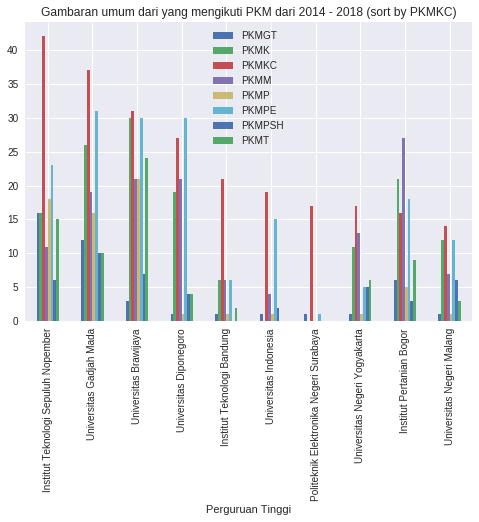

In [142]:
df_ptn = df_cabang.groupby('Perguruan Tinggi').sum().sort_values('PKMKC', ascending = False)
df_ptn.iloc[0:10, 1:].plot(kind = 'bar')
plt.title('Gambaran umum dari yang mengikuti PKM dari 2014 - 2018 (sort by PKMKC)')
plt.show()

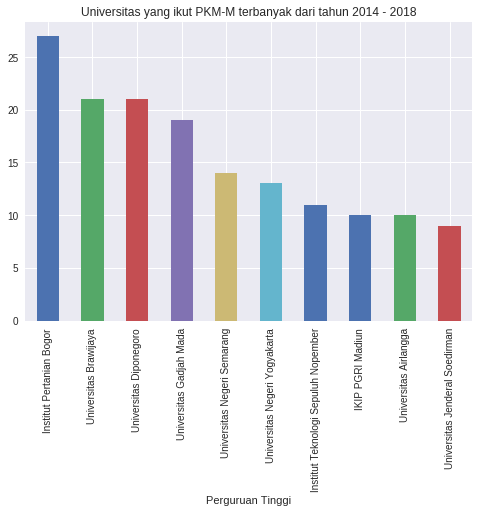

In [0]:
df_ptn = df_cabang.groupby('Perguruan Tinggi').sum().sort_values('PKMM', ascending = False)
df_ptn.iloc[0:10, 4].plot(kind = 'bar')
plt.title('Universitas yang ikut PKM-M terbanyak dari tahun 2014 - 2018')
plt.show()

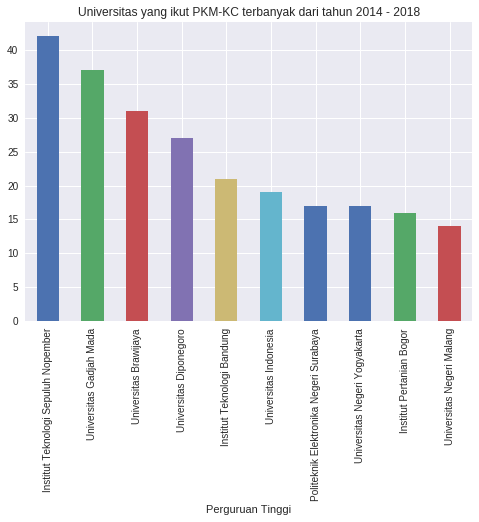

In [0]:
df_ptn = df_cabang.groupby('Perguruan Tinggi').sum().sort_values('PKMKC', ascending = False)
df_ptn.iloc[0:10, 3].plot(kind = 'bar')
plt.title('Universitas yang ikut PKM-KC terbanyak dari tahun 2014 - 2018')
plt.show()